# 🏠 California Housing Prices Dataset

Dataset derived from the 1990 California census.  
It was used in **Chapter 2** of Aurélien Géron's *Hands-On Machine Learning with Scikit-Learn and TensorFlow* and serves as a great introduction to machine learning projects.

---

## 📌 Context
This dataset is widely used for learning purposes because:
- It requires basic preprocessing.
- The features are easy to understand.
- Its size is suitable (not too small, not too large).

---

## 📊 Content
Each row represents data about a California district. The columns are:

1. **longitude** → How far west a house is (higher = farther west)  
2. **latitude** → How far north a house is (higher = farther north)  
3. **housingMedianAge** → Median age of houses in the block  
4. **totalRooms** → Total number of rooms in the block  
5. **totalBedrooms** → Total number of bedrooms in the block  
6. **population** → Total number of residents in the block  
7. **households** → Number of households (groups of residents)  
8. **medianIncome** → Median income of households (in tens of thousands USD)  
9. **medianHouseValue** → Median house value (in USD)  
10. **oceanProximity** → Location relative to the ocean  

---

# Import Data & Libraries

In [73]:
# !pip install catboost

In [74]:
# from google.colab import files
# files.upload()

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [76]:
dataset = pd.read_csv('housing.csv')
df = dataset.copy()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Data Understanding & Cleaning

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [78]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [79]:
df.shape

(20640, 10)

In [80]:
df.duplicated().sum()

np.int64(0)

In [81]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [82]:
for col in df.columns:
  print(f'Colomn: {col} Contains {df[col].nunique()} Unique values \n {df[col].unique()} \n ---------------------------')

Colomn: longitude Contains 844 Unique values 
 [-122.23 -122.22 -122.24 -122.25 -122.26 -122.27 -122.28 -122.29 -122.3
 -122.21 -122.2  -122.19 -122.18 -122.13 -122.16 -122.17 -122.15 -122.14
 -122.12 -122.33 -122.34 -122.06 -122.07 -122.08 -122.09 -122.1  -122.11
 -122.03 -121.97 -122.02 -122.04 -122.05 -121.99 -122.01 -121.96 -121.98
 -122.   -121.93 -121.94 -121.95 -121.92 -121.89 -121.91 -121.9  -121.88
 -121.87 -121.85 -121.86 -121.84 -121.82 -121.77 -121.62 -121.61 -121.72
 -121.73 -121.75 -121.8  -121.76 -121.78 -121.79 -119.78 -119.93 -120.
 -120.56 -120.59 -120.55 -120.25 -120.79 -120.8  -120.65 -120.76 -120.88
 -120.69 -120.93 -120.97 -120.87 -120.98 -120.72 -120.77 -120.66 -120.62
 -120.71 -121.83 -121.81 -121.74 -121.68 -121.54 -121.51 -121.59 -121.58
 -121.6  -121.63 -121.57 -121.65 -121.64 -121.71 -121.66 -121.56 -121.5
 -121.41 -121.39 -121.24 -121.19 -121.36 -121.46 -121.49 -121.44 -121.47
 -121.53 -121.52 -121.55 -121.67 -121.69 -121.7  -120.46 -120.54 -120.67
 -120.9 

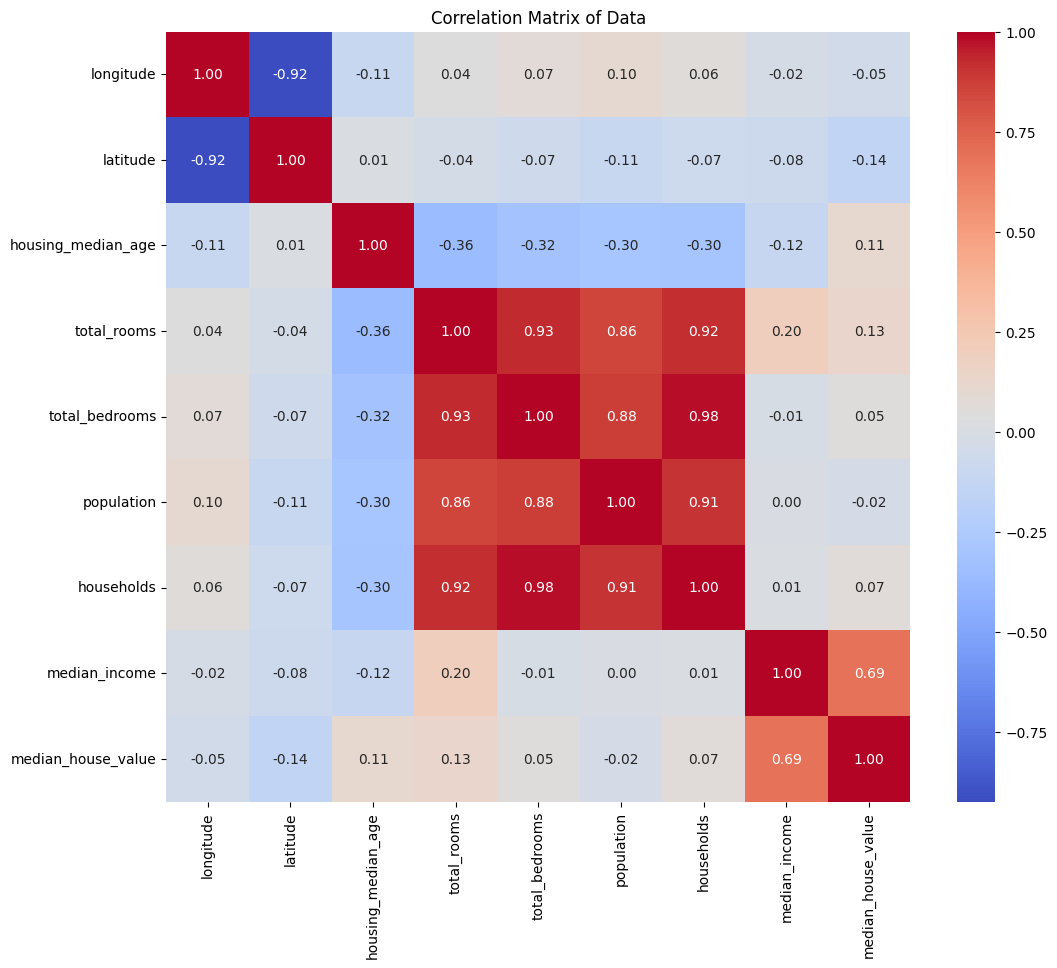

In [83]:
# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Data')
plt.show()

In [84]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

# Data Preprocessing

In [85]:
# Feature Selection
var=VarianceThreshold(threshold=0.1)
var.fit(df.select_dtypes(['int','float']))

VarianceThreshold(threshold=0.1)

In [86]:
variance=pd.DataFrame({'columns name':df.select_dtypes(['int','float']).columns,
                       'Variance':var.get_support()})
variance

,columns name,Variance
0,longitude,True
1,latitude,True
2,housing_median_age,True
3,total_rooms,True
4,total_bedrooms,True
5,population,True
6,households,True
7,median_income,True
8,median_house_value,True


In [87]:
numerical_col = df.select_dtypes(include=['int64', 'float64']).columns
categorical_col = df.select_dtypes(include=['object']).columns

In [88]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [89]:
# Encode categorical features
for col in categorical_col:
    if df[col].nunique() == 2:
        df[col] = LabelEncoder().fit_transform(df[col])
df = pd.get_dummies(df, columns=[col for col in categorical_col if df[col].nunique() > 2], drop_first=True)

In [90]:
scaler = MinMaxScaler()
df[numerical_col] = scaler.fit_transform(df[numerical_col])

In [91]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266,False,False,True,False
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247,False,False,True,False
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051,False,False,True,False
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783,False,False,True,False
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638,False,False,True,False


# Model Building

In [92]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
# ML models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Boosting libraries
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [95]:
# Dictionary of regression models
models = {
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0)
}

In [96]:
# Train & Evaluate
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MSE": mse, "MAE": mae, "R2": r2}

    print(f"==== {name} ====")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print("=====================================")

==== KNN ====
Mean Squared Error: 0.0169
Mean Absolute Error: 0.0866
R2 Score: 0.6959
==== Linear Regression ====
Mean Squared Error: 0.0209
Mean Absolute Error: 0.1045
R2 Score: 0.6254
==== Decision Tree ====
Mean Squared Error: 0.0200
Mean Absolute Error: 0.0896
R2 Score: 0.6416
==== Random Forest ====
Mean Squared Error: 0.0102
Mean Absolute Error: 0.0653
R2 Score: 0.8168
==== XGBoost ====
Mean Squared Error: 0.0095
Mean Absolute Error: 0.0652
R2 Score: 0.8292
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001733 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1843
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 11
[LightGBM] [Info] Start training from score 0.396278
==== LightGBM ====
Mean Squared Error: 0.0097
Mean Absolute Error: 0.0661
R2 Score: 0.8263
==== CatBoost ====


In [97]:
# Convert to DataFrame for better comparison
results_df = pd.DataFrame(results).T
print("\n===== Summary Table =====")
print(results_df)

# Find the best model based on R²
best_model = results_df["R2"].idxmax()
print(f"\nBest Model: {best_model} with R² = {results_df['R2'].max():.4f}")


===== Summary Table =====
                        MSE       MAE        R2
KNN                0.016940  0.086630  0.695917
Linear Regression  0.020867  0.104475  0.625424
Decision Tree      0.019966  0.089594  0.641604
Random Forest      0.010206  0.065311  0.816801
XGBoost            0.009515  0.065249  0.829202
LightGBM           0.009679  0.066121  0.826252
CatBoost           0.008941  0.062948  0.839501

Best Model: CatBoost with R² = 0.8395
